In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout ,Embedding
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('data/airpassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data=data['#Passengers']
data=np.array(data)

In [4]:
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [5]:
data=data.reshape(-1,1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

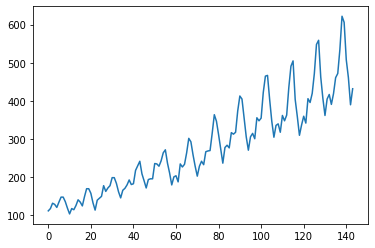

In [6]:
plt.plot(data)

In [7]:
scaler= MinMaxScaler()
data=scaler.fit_transform(data)
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [8]:
train_size=100
test_size=44

In [9]:
train=data[0:train_size,:]
test=data[train_size:144,:]

In [10]:
train.shape , test.shape

((100, 1), (44, 1))

### buile training and testing dataset : 직전 n개 데이터 반영

In [11]:
def get_data(data,look_back):
    dataX , dataY=[] ,[]

    for i in range(len(data)-look_back-1):
        a=data[i:i+look_back,0]
        dataX.append(a)
        dataY.append(data[i+look_back,0])
    return np.array(dataX) ,np.array(dataY)

In [12]:
look_back=2

In [13]:
x_train,y_train=get_data(train,look_back)

In [14]:
x_train.shape, y_train.shape

((97, 2), (97,))

In [15]:
x_train

array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208],
       [0.08494208, 0.06177606],
       [0.06177606, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123552],
       [0.02123552, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984556],
       [0.05984556, 0.04054054],
       [0.04054054, 0.08687259],
       [0.08687259, 0.12741313],
       [0.12741313, 0.12741313],
       [0.12741313, 0.1042471 ],
       [0.1042471 , 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949807],
       [0.06949807, 0.07915058],
       [0.07915058, 0.08880309],
       [0.08880309, 0.14285714],
       [0.14285714, 0.11389961],
       [0.11389961, 0.13127413],
       [0.13127413, 0.14285714],
       [0.14285714, 0.18339768],
       [0.

In [16]:
y_train

array([0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208,
       0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703,
       0.02123552, 0.04247104, 0.07142857, 0.05984556, 0.04054054,
       0.08687259, 0.12741313, 0.12741313, 0.1042471 , 0.05598456,
       0.01930502, 0.06949807, 0.07915058, 0.08880309, 0.14285714,
       0.11389961, 0.13127413, 0.14285714, 0.18339768, 0.18339768,
       0.15444015, 0.11196911, 0.08108108, 0.11969112, 0.12934363,
       0.14671815, 0.17181467, 0.14864865, 0.15250965, 0.22007722,
       0.24324324, 0.26640927, 0.2027027 , 0.16795367, 0.13127413,
       0.17374517, 0.17760618, 0.17760618, 0.25482625, 0.25289575,
       0.24131274, 0.26833977, 0.30888031, 0.32432432, 0.25675676,
       0.20656371, 0.14671815, 0.18725869, 0.19305019, 0.16216216,
       0.25289575, 0.23745174, 0.25096525, 0.30888031, 0.38223938,
       0.36486486, 0.2992278 , 0.24131274, 0.19111969, 0.24131274,
       0.26640927, 0.24903475, 0.31467181, 0.31853282, 0.32046

In [17]:
x_test,y_test=get_data(test,look_back)

In [18]:
x_test.shape, y_test.shape

((41, 2), (41,))

In [36]:
x_test

array([[[0.48455598],
        [0.61389961]],

       [[0.61389961],
        [0.6969112 ]],

       [[0.6969112 ],
        [0.7007722 ]],

       [[0.7007722 ],
        [0.57915058]],

       [[0.57915058],
        [0.46911197]],

       [[0.46911197],
        [0.38803089]],

       [[0.38803089],
        [0.44787645]],

       [[0.44787645],
        [0.45559846]],

       [[0.45559846],
        [0.41312741]],

       [[0.41312741],
        [0.4980695 ]],

       [[0.4980695 ],
        [0.47104247]],

       [[0.47104247],
        [0.5       ]],

       [[0.5       ],
        [0.63899614]],

       [[0.63899614],
        [0.74710425]],

       [[0.74710425],
        [0.77413127]],

       [[0.77413127],
        [0.57915058]],

       [[0.57915058],
        [0.49227799]],

       [[0.49227799],
        [0.3976834 ]],

       [[0.3976834 ],
        [0.44980695]],

       [[0.44980695],
        [0.49420849]],

       [[0.49420849],
        [0.45945946]],

       [[0.45945946],
        [0.5

In [19]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [20]:
x_train.shape, x_test.shape

((97, 2, 1), (41, 2, 1))

### build LSTM model

In [21]:
model=Sequential()
model.add(LSTM(5,input_shape=(2,1)))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [24]:
history=model.fit(x_train,y_train,epochs=50,batch_size=1)

Train on 97 samples
Epoch 1/50
97/97 [==============================] - 2s 25ms/sample - loss: 0.0427
Epoch 2/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0179
Epoch 3/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0146
Epoch 4/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0132
Epoch 5/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0115
Epoch 6/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0100
Epoch 7/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0088
Epoch 8/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0076
Epoch 9/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0063
Epoch 10/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0052
Epoch 11/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0045
Epoch 12/50
97/97 [==============================] - 0s 2ms/sample - loss: 0.0040
Epoc

In [25]:
y_pred=model.predict(x_test)

In [26]:
y_pred=scaler.inverse_transform(y_pred)

In [34]:
y_test1=np.array(y_test)
y_test2=y_test1.reshape(-1,1)
y_test3=scaler.inverse_transform(y_test2)

In [28]:
y_pred

array([[376.06656],
       [427.72552],
       [447.3604 ],
       [416.66684],
       [359.8174 ],
       [312.63803],
       [309.31992],
       [325.43127],
       [316.04532],
       [328.5223 ],
       [341.32153],
       [342.64023],
       [386.32068],
       [446.42862],
       [477.14606],
       [433.08093],
       [365.9196 ],
       [320.62842],
       [312.0969 ],
       [336.1144 ],
       [337.3526 ],
       [361.9931 ],
       [385.65387],
       [393.41373],
       [430.37833],
       [490.23206],
       [526.2256 ],
       [484.6025 ],
       [416.43033],
       [368.79535],
       [370.49805],
       [395.89737],
       [388.02264],
       [390.6717 ],
       [424.39392],
       [448.137  ],
       [483.8962 ],
       [550.5996 ],
       [575.76373],
       [524.61676],
       [462.62085]], dtype=float32)

In [35]:
y_test3

array([[465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

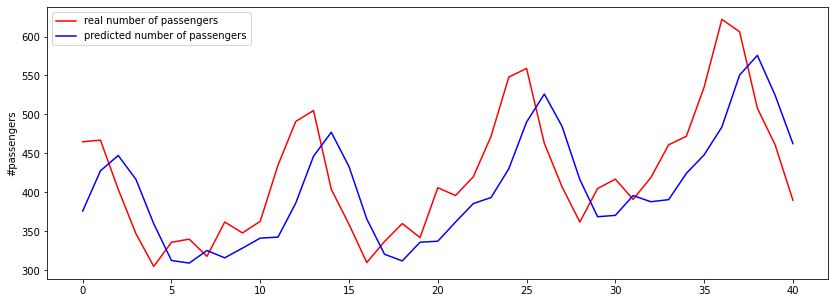

In [31]:
plt.figure(figsize=(14,5))
plt.plot(y_test3,color='red',label='real number of passengers')
plt.plot(y_pred,color='blue',label='predicted number of passengers')
plt.ylabel('#passengers')
plt.legend()
plt.show()